In [4]:
import matplotlib.pyplot as plt
import numpy as np
import operator
import warnings
import random
import math
from path import Path
warnings.simplefilter("ignore")
%matplotlib inline

In [5]:
def textPure(textNP):
    """Data una stringa, textPure ritorna una stringa priva disimboli jolly (,.;'(,)', # ecc..)
         e con tutti i caratteri in minuscolo"""
    for i in range(32,47):
        if(textNP.find(chr(i))>=0):
            textNP = textNP.replace(chr(i),"")
    for i in range(58,64):
        if(textNP.find(chr(i))>=0):
            textNP = textNP.replace(chr(i),"")
    if(textNP.find("\n")>=0):
        textNP = textNP.replace("\n","")
    textNP= textNP.lower()
    return textNP
        

In [6]:
def qgramma(textP, q, f):
    qGramma = {}
    for i in range(0,len(textP)-(q-1)):
        if((textP[i:i+q] not in qGramma)):
            qGramma[textP[i:i+q]] = textP.count(textP[i:i+q])
    qGramma = {k: qGramma[k] for k in sorted(qGramma.keys(),reverse = True, key=qGramma.__getitem__)}
    r = 0
    qGRAMMA = {}
    for k in qGramma:
        qGRAMMA[k] = qGramma[k]
        r = r+1
        if(r==f):
            break
    plt.bar(list(qGRAMMA.keys()), list(qGRAMMA.values()))
    plt.xlabel('q-gramma', fontsize=5)
    plt.ylabel('frequenze assolute', fontsize=5)
    return qGRAMMA

In [7]:
def frequencyQgr(qGramma):
    n = 0;
    for i in qGramma.values():
        n = n+i
    distr = {}    
    for q, freq in qGramma.items():
        distr[q] = freq/n
    return distr

In [8]:
def entropy(freqQg):
    entropy = 0
    for freq in freqQg.values():
        entropy = entropy+(-freq*math.log(freq))
    return entropy

In [29]:
def coincIndex(qGramma):
    indexC = 0
    for fi in qGramma.values():
            indexC += fi**2                           
    return indexC

In [10]:
dirPath = Path().getcwd()
filePath = dirPath/"mobydick.txt"
file = open(filePath)
text = file.read()
file.close()
print(text)
textP = textPure(text)
print(textP)

Call me Ishmael. Some years ago- never mind how long precisely- having little or no money in my purse, and nothing particular to interest me on shore, I thought I would sail about a little and see the watery part of the world. It is a way I have of driving off the spleen and regulating the circulation. Whenever I find myself growing grim about the mouth; whenever it is a damp, drizzly November in my soul; whenever I find myself involuntarily pausing before coffin warehouses, and bringing up the rear of every funeral I meet; and especially whenever my hypos get such an upper hand of me, that it requires a strong moral principle to prevent me from deliberately stepping into the street, and methodically knocking people's hats off- then, I account it high time to get to sea as soon as I can. This is my substitute for pistol and ball. With a philosophical flourish Cato throws himself upon his sword; I quietly take to the ship. There is nothing surprising in this. If they but knew it, almost

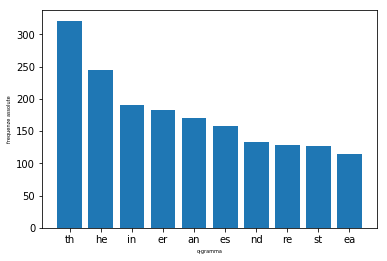

In [24]:
qGramma2 = qgramma(textP, 2, f=10)

In [25]:
freqQgr2 = frequencyQgr(qGramma2)

In [26]:
freqQgr2

{'th': 0.1814584511023177,
 'he': 0.13793103448275862,
 'in': 0.10797060486150367,
 'er': 0.10288298473713962,
 'an': 0.09609949123798757,
 'es': 0.0893159977388355,
 'nd': 0.07518371961560204,
 're': 0.07292255511588468,
 'st': 0.071791972866026,
 'ea': 0.0644431882419446}

In [27]:
entropy(freqQgr2)

2.249395552762766

In [30]:
coincIndex(freqQgr2)

0.11168446209945099

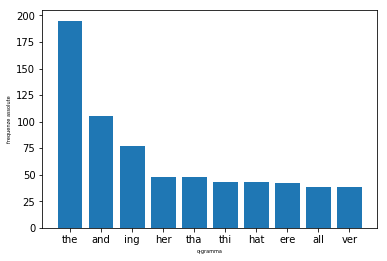

In [15]:
qGramma3 = qgramma(textP, 3, f=10)

In [60]:
frequencyQgr(qGramma3)

{'the': 0.2880354505169867,
 'and': 0.155096011816839,
 'ing': 0.1137370753323486,
 'her': 0.07090103397341212,
 'tha': 0.07090103397341212,
 'thi': 0.06351550960118169,
 'hat': 0.06351550960118169,
 'ere': 0.0620384047267356,
 'all': 0.056129985228951254,
 'ver': 0.056129985228951254}

In [17]:
freqQgr3 = frequencyQgr(qGramma3)

In [18]:
entropy(freqQgr3)

2.116030287279904

In [31]:
coincIndex(freqQgr3)

0.14822758324260524

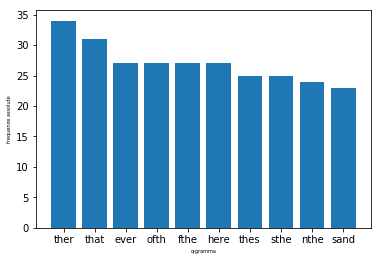

In [19]:
qGramma4 = qgramma(textP, 4, f=10)

In [20]:
qGramma4 = frequencyQgr(qGramma4)

In [21]:
qGramma4

{'ther': 0.1259259259259259,
 'that': 0.11481481481481481,
 'ever': 0.1,
 'ofth': 0.1,
 'fthe': 0.1,
 'here': 0.1,
 'thes': 0.09259259259259259,
 'sthe': 0.09259259259259259,
 'nthe': 0.08888888888888889,
 'sand': 0.08518518518518518}

In [22]:
freqQgr4 = frequencyQgr(qGramma4)

In [23]:
entropy(freqQgr4)

2.296074948470272

In [32]:
coincIndex(freqQgr4)

0.10134430727023322